In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
 import numpy as np
import pandas as pd
import datetime as dt

In [3]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [4]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
 # reflect an existing database into a new model
Base = automap_base()
    
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
dir(Base.classes)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__',
 'measurement',
 'station']

In [7]:
# Save references to each table
measure_table = Base.classes.measurement
station_table = Base.classes.station

In [8]:
station_table.__dict__

mappingproxy({'__table__': Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.station'> at 7ff22803c090>,
              '__init__': <function sqlalchemy.orm.instrumentation.__init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7ff2898b41d0>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7ff2898b4130>,
              'name': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x7ff2898b4090>,
              'latitude': <sqlalchemy.orm.attributes.Instrumented

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
firstm = session.query(measure_table).first()
# print(firstm)
firstm.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff238050700>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

In [11]:
firsts = session.query(station_table).first()
# print(firstd)
firsts.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff27a7d6a90>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Precipitation Analysis


In [12]:
# Find the most recent date in the data set. 
cur_date = session.query(func.max(measure_table.date)).first()
cur_date = cur_date[0]
cur_date

'2017-08-23'

In [13]:
conn = engine.connect()

In [14]:
# Calculate the date one year from the last date in data set.
pre_yr = dt.date(2017,8,23) -dt.timedelta(days=365)
pre_yr

datetime.date(2016, 8, 23)

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
last_yr_precip = session.query(measure_table.date, measure_table.prcp).\
filter(measure_table.date >= pre_yr).all()
last_yr_precip

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_yr_precip, columns=['date', 'prcp'])
df = df.sort_values('date')
df.set_index('date', inplace=True)
df


,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


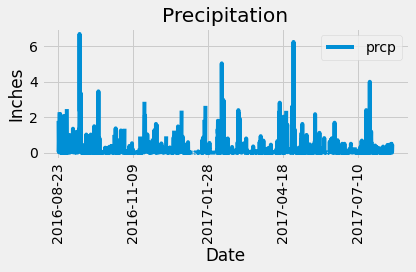

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation')
plt.tight_layout()
# plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis


In [18]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station_table.station)).all()

[(9,)]

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measure_table.station, func.count(measure_table.station)).\
group_by(measure_table.station).order_by(func.count(measure_table.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(measure_table.tobs)).\
filter(measure_table.station == 'USC00519281').first()
min_temp

(54.0,)

In [40]:
max_temp = session.query(func.max(measure_table.tobs)).\
filter(measure_table.station == 'USC00519281').first()
max_temp

(85.0,)

In [43]:
avg_temp = session.query(func.avg(measure_table.tobs)).\
filter(measure_table.station == 'USC00519281').first()
avg_temp

(71.66378066378067,)

In [48]:
# Using the most active station id, Query the last 12 months of temperature observation data
#for this station

last_yr_temp = session.query(measure_table.date, measure_table.tobs).\
filter(measure_table.date >= pre_yr).all()
last_yr_temp

[('2016-08-23', 81.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-01', 80.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [55]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df2 = pd.DataFrame(last_yr_temp, columns=['date', 'tobs'])
# df2 = df.sort_values('date')
df2.set_index('date', inplace=True)
df2

,tobs
date,
2016-08-23,81.0
2016-08-24,79.0
2016-08-25,80.0
2016-08-26,79.0
2016-08-27,77.0
...,...
2017-08-19,71.0
2017-08-20,78.0
2017-08-21,76.0


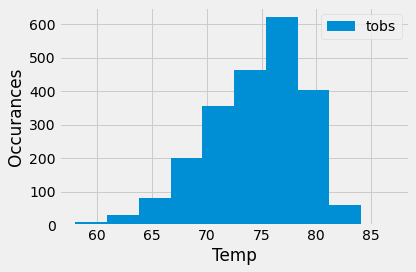

In [60]:
#plot the results as a histogram
df2.plot(kind='hist')
plt.xlabel('Temp')
plt.ylabel('Occurances')
plt.tight_layout()

In [62]:
#Close Session
session.close()